In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [2]:
file_address = 'C:/Users/dell/Desktop/dataset/Biomass_History.csv'
data = pd.read_csv(file_address)

e:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


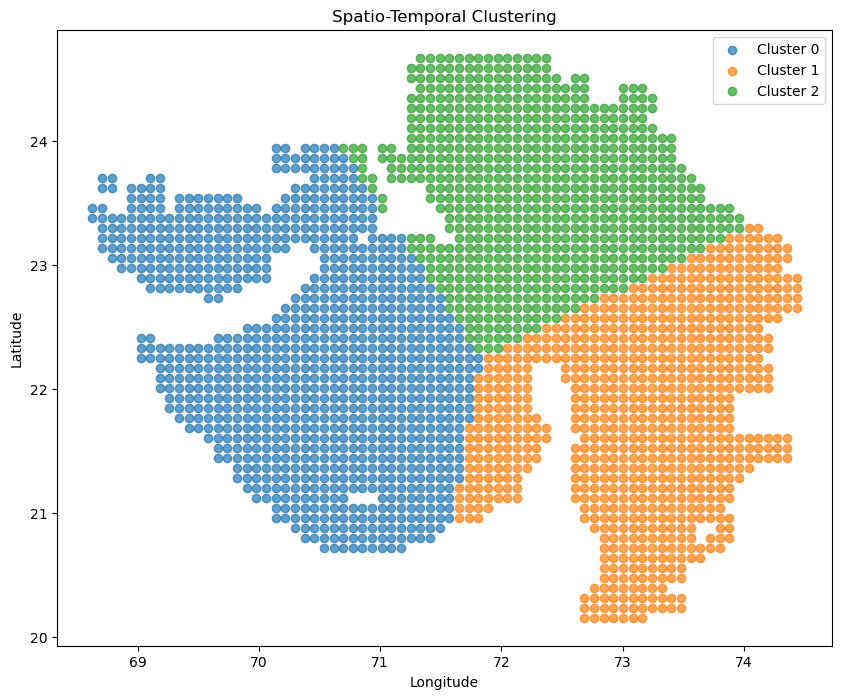

IndexError: list index out of range

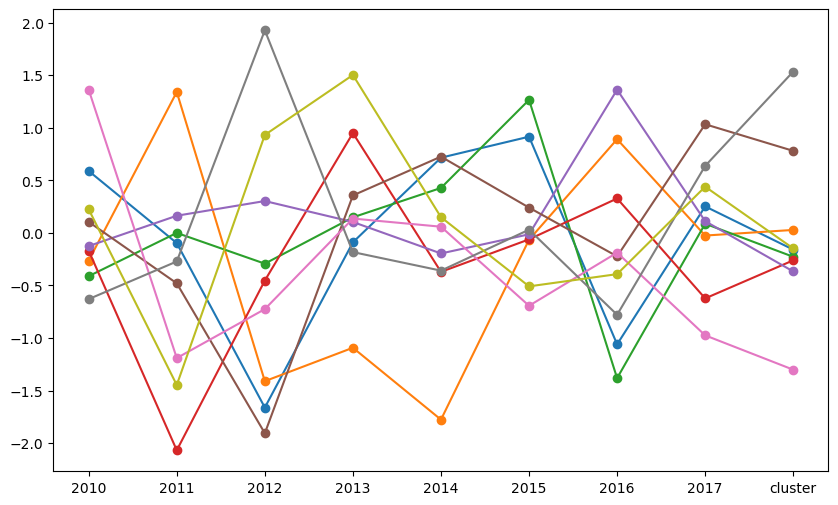

In [16]:

# Number of clusters
num_clusters = 3

# Extract the spatial coordinates (latitude and longitude)
spatial_data = data[['Latitude', 'Longitude']]

# Extract the time-series data (years 2010 to 2017)
time_series_data = data.iloc[:, 3:]  # Assuming columns from 2010 to 2017

# Create the k-means clustering model for spatial data
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the spatial data
kmeans_model.fit(spatial_data)

# Get cluster assignments for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels back to the DataFrame
data['cluster'] = cluster_labels

# Visualize the clusters on a map (using a scatter plot)
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatio-Temporal Clustering')
plt.legend()
plt.show()

# Time-Series Analysis within each cluster
years = list(time_series_data.columns)
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    
    # Generate a random trend for each year within each cluster (for demonstration purposes)
    trends = cluster_data.iloc[:, 3:].apply(lambda row: np.random.normal(0, 1, size=len(years)), axis=1)
    
    # Visualize the time-series trend within each cluster
    plt.figure(figsize=(10, 6))
    for i in range(len(trends)):
        plt.plot(years, trends.iloc[i], label=f'Year {years[i]}', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Trend')
    plt.title(f'Time-Series Trend - Cluster {cluster}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Model Evaluation (optional)
# If you have labeled data or ground truth, you can evaluate the clustering performance
# using metrics like silhouette score, completeness, or homogeneity.

# For demonstration purposes, let's calculate the silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(spatial_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')